<a href="https://colab.research.google.com/github/BrianGisemba/House-Price-Prediction/blob/main/MORINGA_SCHOOL_HOUSE_PRICE_PREDICTION_ANALYSIS_BRIAN_MICHIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.DEfinning the Question

a)SPECIFY THE QUESTION

As Data Scientist we have been tasked to study the factors that affect housing prices and create a suitable model that will help predict the sale of prices. 



b)Defining the Metrics of Success

We will be able to determine the model that can be used to accurately predict the housing prices.


c)Understanding the context

To determine the right housing prices the Real Estate wants a model that can accurately predict hence increasing the number of customers.

##IMPORTING LIBRARIES

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##LOADING AND PREVIEWING THE DATASET

In [ ]:
#loading the dataset
housing=pd.read_csv("/content/Independent Project Week 7 - house_data.csv")


In [ ]:
#peviewing the top of the dataset
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#previewing the bottom of the dataset
housing.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#looking at the number of records
housing.shape

(21613, 20)

In [ ]:
#looking  at the data types of the variables
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

##CLEANING THE DATASET

In [ ]:
#Checking for duplicates
housing.duplicated().sum()

3

In [ ]:
#viewing the duplicates
housing[housing.duplicated()]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


There is no need of dropping the duplicates

In [ ]:
#checking for missing values
housing.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#viewing the columns
housing.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

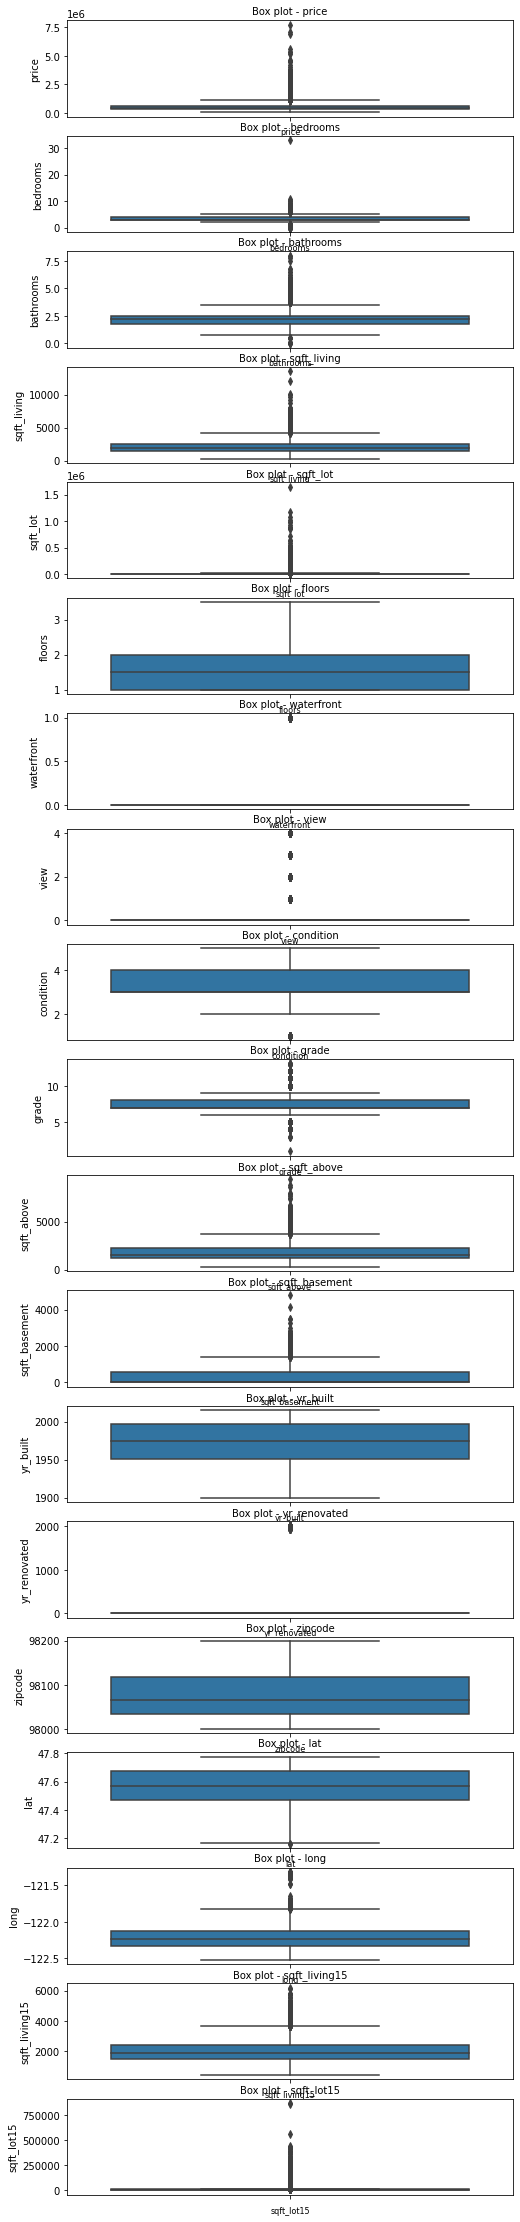

In [ ]:
#checking for outliers
#Box plots to see the outliers

col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=housing[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [ ]:
# dealing with outliers
# quantiles
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
house = housing[~((housing < (Q1 - 1.5 * IQR)) | (housing > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(house.shape)

# Printing the shape of our old dataset
print(housing.shape)

(14931, 20)
(21613, 20)


In [ ]:
# Check for unique values in each column
for col in house.columns.to_list():
  print(f'{col} column unique values:\n')
  print(house[col].unique(), end='\n')
  print('\n')

id column unique values:

[7129300520 5631500400 2487200875 ... 1523300141  291310100 1523300157]


price column unique values:

[221900. 180000. 604000. ... 507250. 610685. 402101.]


bedrooms column unique values:

[3 2 4 5]


bathrooms column unique values:

[1.   3.   2.   2.25 1.5  2.5  1.75 2.75 3.25 3.5  0.75 1.25]


sqft_living column unique values:

[1180  770 1960 1680 1715 1060 1780 1890 1160 1370 1810 1600 1200 1250
 1620 2270 1070 2450 1710 1400 1520 2570 2320 1190 2330 1090 2060 2360
 1220 2620 3595 1570 1280 3160  990 2290 1410 1980 2730 2830 2250 2420
 1850 1260 2519 1540 1660 2770 2240 1000 2750 2380 1760 1040 2350 1900
 2020  960 2140 2660 1610 1030 1580 2070 2340 1670 1240 2030 2310 1590
  880 1450 2100 2910 2160 2010 2590 1170 1110 2820 2550 1430 1360 2640
 1910 2680 1340 1120 1970 1350 2440 1050 3130 1490 1330 2230 1650 2180
 1690 2150  860 1940 1010 1300  910 2480  900 1550 1270 1720  850 1320
 1750 2220 1510 1480 2280  830 2740  720 1560 3360 1730 2460 1700 2653


In [ ]:
#dropping irrelevant columns with id and those with zero values
house.drop(['id','view', 'yr_renovated'],inplace=True,axis=1)

##UNIVARIATE ANALYSIS

In [ ]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.493100e+04,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.0,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000,14931.000000
mean,4.383980e+05,3.261938,1.972105,1814.005090,6988.593798,1.471268,0.0,3.420267,7.380082,1585.053312,228.951778,1971.721854,98079.756949,47.558871,-122.230141,1796.650660,6868.036300
std,1.800721e+05,0.772803,0.646070,614.579034,3355.886692,0.547917,0.0,0.647103,0.804876,601.412165,353.231478,29.247428,53.482436,0.142099,0.123703,507.192667,2987.930774
min,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.0,2.000000,6.000000,480.000000,0.000000,1900.000000,98001.000000,47.189500,-122.472000,620.000000,651.000000
25%,3.000000e+05,3.000000,1.500000,1350.000000,4690.000000,1.000000,0.0,3.000000,7.000000,1140.000000,0.000000,1952.000000,98033.000000,47.457550,-122.333000,1430.000000,4800.000000
50%,4.050000e+05,3.000000,2.000000,1740.000000,7020.000000,1.000000,0.0,3.000000,7.000000,1430.000000,0.000000,1974.000000,98072.000000,47.569700,-122.264000,1710.000000,7172.000000
75%,5.470000e+05,4.000000,2.500000,2210.000000,8925.000000,2.000000,0.0,4.000000,8.000000,1910.000000,450.000000,1999.000000,98118.000000,47.683500,-122.152500,2090.000000,8649.500000
max,1.120000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,0.0,5.000000,9.000000,3740.000000,1400.000000,2015.000000,98199.000000,47.777600,-121.821000,3640.000000,17550.000000


In [ ]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#Central Tendancies
#mean
col_names = house.columns
for i, col_val in enumerate(col_names):
  print('The mean of ' + str(col_val) + ' is ' + str(house[col_val].mean()))

The mean of price is 438397.98935101466
The mean of bedrooms is 3.2619382492800213
The mean of bathrooms is 1.9721050164088139
The mean of sqft_living is 1814.0050900810395
The mean of sqft_lot is 6988.593798138102
The mean of floors is 1.4712678320273258
The mean of waterfront is 0.0
The mean of condition is 3.420266559507066
The mean of grade is 7.380081709195633
The mean of sqft_above is 1585.0533119014133
The mean of sqft_basement is 228.95177817962627
The mean of yr_built is 1971.7218538610944
The mean of zipcode is 98079.75694863037
The mean of lat is 47.558871234344956
The mean of long is -122.23014111579963
The mean of sqft_living15 is 1796.6506597012926
The mean of sqft_lot15 is 6868.036300314781


In [ ]:
#standard deviation
for i, col_val in enumerate(col_names):
  print('The standard deviation of ' + str(col_val) + ' is ' + str(house[col_val].std()))


The standard deviation of price is 180072.12964506328
The standard deviation of bedrooms is 0.772802916289596
The standard deviation of bathrooms is 0.6460701823056729
The standard deviation of sqft_living is 614.5790338561311
The standard deviation of sqft_lot is 3355.886692064995
The standard deviation of floors is 0.5479165861648201
The standard deviation of waterfront is 0.0
The standard deviation of condition is 0.6471032541306595
The standard deviation of grade is 0.8048761433806246
The standard deviation of sqft_above is 601.412164881316
The standard deviation of sqft_basement is 353.23147770824335
The standard deviation of yr_built is 29.247428037764497
The standard deviation of zipcode is 53.48243632962268
The standard deviation of lat is 0.14209875205377842
The standard deviation of long is 0.12370272461413255
The standard deviation of sqft_living15 is 507.192667400437
The standard deviation of sqft_lot15 is 2987.9307738071884


In [ ]:
#skewness
for i, col_val in enumerate(col_names):
  print('The skewness of ' + str(col_val) + ' is ' + str(house[col_val].skew()))

The skewness of price is 0.8310370140020662
The skewness of bedrooms is 0.24324232660237752
The skewness of bathrooms is -0.09337022983248325
The skewness of sqft_living is 0.54905523385565
The skewness of sqft_lot is 0.5290962308728061
The skewness of floors is 0.7729301068457873
The skewness of waterfront is 0
The skewness of condition is 1.118996893440687
The skewness of grade is 0.31844364997193453
The skewness of sqft_above is 0.9654970101164653
The skewness of sqft_basement is 1.323470063545768
The skewness of yr_built is -0.4504943283138924
The skewness of zipcode is 0.3210902624020126
The skewness of lat is -0.4418156672451687
The skewness of long is 0.6836071655081517
The skewness of sqft_living15 is 0.7505305072234247
The skewness of sqft_lot15 is 0.29763737231186055


Most variables are positively skewed indicating most values are greater then the mean.Most values appear on the right side.

In [ ]:
#kurtosis
for i, col_val in enumerate(col_names):
  print('The kurtosis of ' + str(col_val) + ' is ' + str(house[col_val].kurt()))

The kurtosis of price is 0.4025266273643773
The kurtosis of bedrooms is -0.27207015505350807
The kurtosis of bathrooms is -0.8168323710688368
The kurtosis of sqft_living is -0.09269161512621382
The kurtosis of sqft_lot is 0.48980883264004893
The kurtosis of floors is -0.2185481484264904
The kurtosis of waterfront is 0
The kurtosis of condition is 0.3135769880171462
The kurtosis of grade is -0.3391307916542434
The kurtosis of sqft_above is 0.410133131253541
The kurtosis of sqft_basement is 0.5031912749592551
The kurtosis of yr_built is -0.6527442111398205
The kurtosis of zipcode is -0.9544758776939739
The kurtosis of lat is -0.8521116713897365
The kurtosis of long is -0.26444559280496227
The kurtosis of sqft_living15 is 0.2953301981455212
The kurtosis of sqft_lot15 is 0.18808572904676302


In [ ]:
house['bedrooms'].value_counts()

3    7510
4    4406
2    2175
5     840
Name: bedrooms, dtype: int64

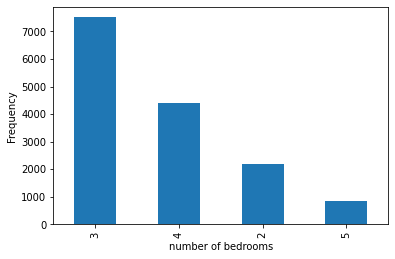

In [ ]:
#Bar chart showing the frequency of the number of bedrooms
house['bedrooms'].value_counts().plot.bar()
plt.xlabel('number of bedrooms')
plt.ylabel('Frequency')
plt.show()

##BIVARIATE ANALYSIS

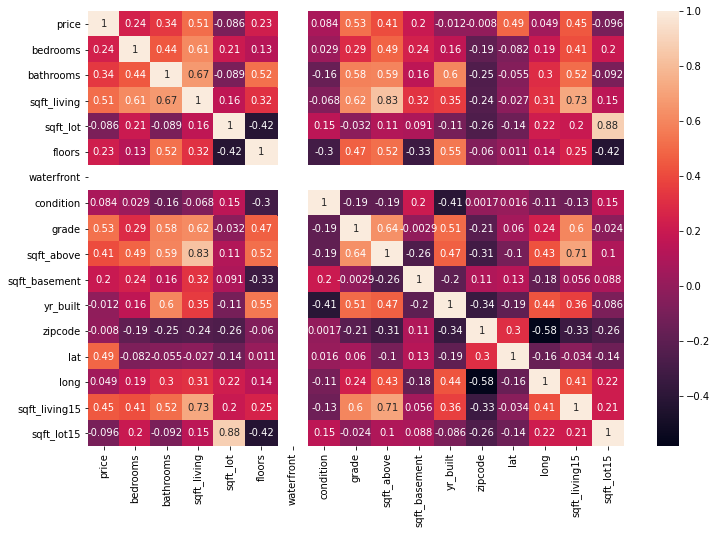

In [ ]:
#Heat map showing correlation
plt.figure(figsize=(12, 8))

corr = house.corr()
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

In [ ]:
corr = house.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.239214,0.340767,0.514465,-0.085519,0.227441,NaN,0.084215,0.527261,0.408152,0.200186,-0.012176,-0.008025,0.490997,0.049406,0.447504,-0.095735
bedrooms,0.239214,1.000000,0.443816,0.614615,0.205092,0.128898,NaN,0.029109,0.289933,0.485829,0.242182,0.159318,-0.189590,-0.082263,0.191199,0.413615,0.196653
bathrooms,0.340767,0.443816,1.000000,0.669337,-0.088711,0.524475,NaN,-0.157639,0.584361,0.592870,0.155143,0.604099,-0.250526,-0.055468,0.301019,0.515211,-0.091677
sqft_living,0.514465,0.614615,0.669337,1.000000,0.164760,0.317437,NaN,-0.068415,0.622565,0.831448,0.324253,0.351198,-0.239981,-0.027359,0.314039,0.727137,0.150074
sqft_lot,-0.085519,0.205092,-0.088711,0.164760,1.000000,-0.416436,NaN,0.151206,-0.032188,0.114661,0.091440,-0.106939,-0.257420,-0.142242,0.222175,0.200412,0.882197
floors,0.227441,0.128898,0.524475,0.317437,-0.416436,1.000000,NaN,-0.302576,0.472503,0.518531,-0.330550,0.552402,-0.060073,0.010908,0.142078,0.254738,-0.423910
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,0.084215,0.029109,-0.157639,-0.068415,0.151206,-0.302576,NaN,1.000000,-0.189171,-0.189246,0.203177,-0.405011,0.001657,0.016100,-0.105117,-0.131915,0.153056
grade,0.527261,0.289933,0.584361,0.622565,-0.032188,0.472503,NaN,-0.189171,1.000000,0.637885,-0.002877,0.509145,-0.214973,0.060172,0.238483,0.603934,-0.023650
sqft_above,0.408152,0.485829,0.592870,0.831448,0.114661,0.518531,NaN,-0.189246,0.637885,1.000000,-0.255985,0.473741,-0.308117,-0.103869,0.426250,0.710195,0.101779


##MULTIVARIATE ANALYSIS

In [ ]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#using LDA to find the coefficients that have the most weight in predicting
#splitting the variables
X=house[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house['price']

In [ ]:
#Import linear Doscriminant analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#create an instance of LDA
lda=LDA()
lda_=lda.fit(X,y)
lda_x=lda_.transform(X)
lda_.coef_

array([[ 1.18958921e+00, -1.43799727e+00, -2.74615485e-03, ...,
        -4.71146717e+00, -2.41315806e-03,  1.27268433e-03],
       [-1.70600912e+00, -5.83034038e-01, -1.49154131e-03, ...,
        -2.37961388e+00, -2.77321281e-03, -1.14407779e-05],
       [ 1.10969699e+00, -2.42396572e+00, -1.93825300e-03, ...,
        -1.77314481e+01, -6.32020049e-03,  7.52845711e-04],
       ...,
       [-7.21335522e-01,  1.75194011e+00,  1.36707754e-03, ...,
        -3.27915274e+00,  2.71769424e-03, -1.78220672e-04],
       [ 5.53203351e-01, -1.34467619e-01,  3.58144292e-03, ...,
        -7.22833848e+00,  2.87310282e-04, -2.84078806e-04],
       [-3.16170709e+00, -6.41557566e+00,  7.54433009e-03, ...,
        -2.39102695e-01, -2.86551877e-03, -4.93000519e-05]])

In [ ]:
#creating a dataframe
hse=pd.DataFrame(index=X.columns.values,data=lda_.coef_[0].T)
hse.sort_values(0,ascending=False)

,0
bedrooms,1.189589e+00
floors,8.513644e-01
yr_built,7.306751e-02
zipcode,3.240791e-02
sqft_lot15,1.272684e-03
waterfront,-4.786170e-17
sqft_lot,-1.609760e-04
sqft_above,-1.621751e-03
sqft_basement,-2.286221e-03
sqft_living15,-2.413158e-03


The following coefficients have a greater weight in predicting the price-bedrooms,floors,year built,zipcode and sqft_lot15

##LINEAR REGRESSION

In [ ]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
#splitting the variables
X=house[['bedrooms','floors','yr_built','zipcode','sqft_lot15']]
y=house['price']

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#running the linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,55841.625182
floors,100501.028407
yr_built,-1467.936606
zipcode,-142.795961
sqft_lot15,-2.370892


In [ ]:
# 
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
5939,410000.0,436440.244745
2643,305000.0,371075.824268
14159,433000.0,391036.099274
20532,550000.0,402988.567793
17869,335000.0,498599.675913
...,...,...
10780,750000.0,423305.094825
2095,800000.0,508572.989964
14819,373500.0,495533.451605
16274,160000.0,423286.489283


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 133727.0369143668
Mean Squared Error: 28342898727.61848
Root Mean Squared Error: 168353.4933632756


MULTICOLLINEARITY

In [ ]:
#detecting multicollinearity
#Viewing correlations between the variables
independent=house[['bedrooms','floors','yr_built','zipcode','sqft_lot15']]
correlations = independent.corr()

correlations

,bedrooms,floors,yr_built,zipcode,sqft_lot15
bedrooms,1.000000,0.128898,0.159318,-0.189590,0.196653
floors,0.128898,1.000000,0.552402,-0.060073,-0.423910
yr_built,0.159318,0.552402,1.000000,-0.344105,-0.086088
zipcode,-0.189590,-0.060073,-0.344105,1.000000,-0.257451
sqft_lot15,0.196653,-0.423910,-0.086088,-0.257451,1.000000


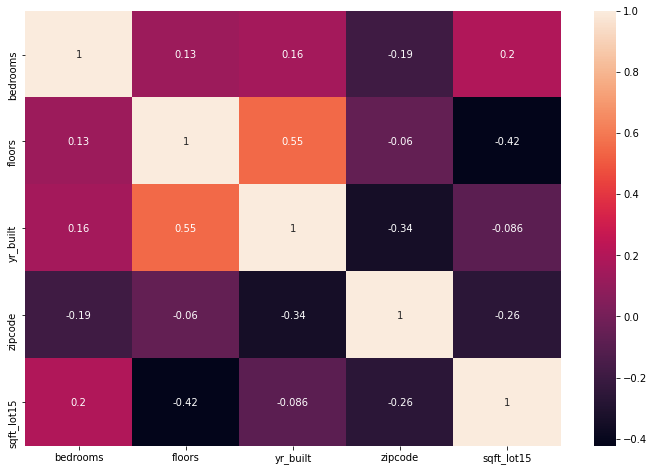

In [ ]:
#checking the heat map
plt.figure(figsize=(12, 8))

sns.heatmap(correlations, 
            xticklabels = correlations.columns.values,
            yticklabels = correlations.columns.values,
            annot = True);

In [ ]:
#computing VIF
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,floors,yr_built,zipcode,sqft_lot15
bedrooms,1.116155,-0.248111,-0.028677,0.109900,-0.298847
floors,-0.248111,1.868090,-0.953647,-0.072476,0.739936
yr_built,-0.028677,-0.953647,1.687083,0.484701,-0.128596
zipcode,0.109900,-0.072476,0.484701,1.264341,0.314897
sqft_lot15,-0.298847,0.739936,-0.128596,0.314897,1.442435


There is no multicollinearity

HETEROSKEDASTICITY

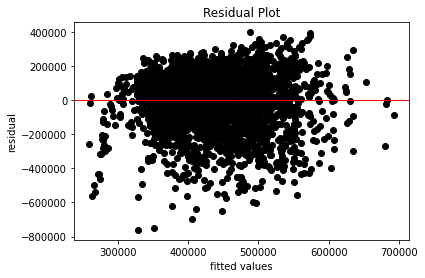

In [ ]:
# Bartlett's test

residuals = np.subtract(y_pred, y_test)

# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
#heteroskedasticity test
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)
#hypothesis testing for homogenity in variance
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

0.0
the variances are homogeneous!


##QUANTILE REGRESSION

In [ ]:
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~  bedrooms + floors + yr_built + zipcode + sqft_lot15', data=house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.06922
Model:                       QuantReg   Bandwidth:                   3.330e+04
Method:                 Least Squares   Sparsity:                    4.394e+05
Date:                Fri, 23 Jul 2021   No. Observations:                14931
Time:                        04:03:14   Df Residuals:                    14925
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.7348      0.408    161.042      0.000      64.935      66.535
bedrooms    5.525e+04   2447.937     22.568      0.000    5.04e+04       6e+04
floors      1.045e+05   4475.612     23.347      0.000    9.57e+04    1.13e+05
yr_built   -1703.5404     74.267    -22.938      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


BEDROOMS

In [ ]:
# Other quantiles

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['bedrooms']] + res.conf_int().loc['bedrooms'].tolist())

# Making a dataframe of the same name to view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

,qt,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.1,-38.037523,29650.991694,26914.087482,32387.895907
1,0.2,-57.395853,37455.179848,34383.612639,40526.747057
2,0.3,-16.504000,41283.029604,37653.342956,44912.716252
3,0.4,94.451093,47175.074908,42955.456565,51394.693251
4,0.5,65.734764,55245.331152,50447.073710,60043.588594
5,0.6,7.146033,64974.384383,59972.434337,69976.334429
6,0.7,112.346000,70922.139636,65520.609213,76323.670059
7,0.8,95.240528,80538.076477,74233.931051,86842.221904
8,0.9,20.461207,84479.712290,76352.898353,92606.526227


In [ ]:
x_ = house['bedrooms'].values.reshape(-1,1)
y_ = house['price'].values
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

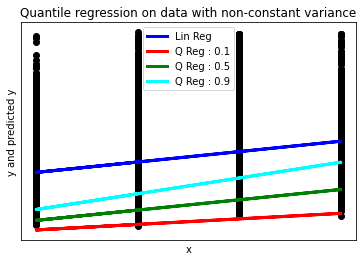

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['bedrooms'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['bedrooms'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['bedrooms'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()


<Figure size 432x288 with 0 Axes>

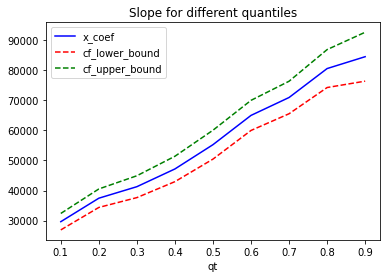

In [ ]:
# Changes in the quantile coeffiecients

plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

FLOORS

In [ ]:
# Other quantiles

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['floors']] + res.conf_int().loc['floors'].tolist())

# Making a dataframe of the same name to view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

,qt,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.1,-38.037523,51963.403898,47079.235483,56847.572314
1,0.2,-57.395853,62592.381196,57004.095679,68180.666713
2,0.3,-16.504000,78168.462280,71611.489400,84725.435161
3,0.4,94.451093,95230.499113,87528.839381,102932.158845
4,0.5,65.734764,104491.751552,95719.002672,113264.500432
5,0.6,7.146033,112163.261864,102975.748180,121350.775547
6,0.7,112.346000,122168.793907,112168.051715,132169.536098
7,0.8,95.240528,125980.958450,114270.227382,137691.689518
8,0.9,20.461207,131901.506794,116500.571303,147302.442284


In [ ]:
x_ = house['floors'].values.reshape(-1,1)
y_ = house['price'].values
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

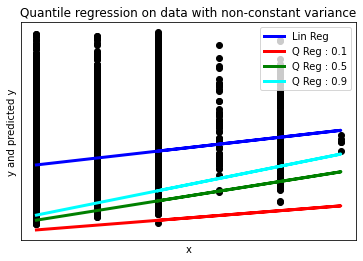

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['floors'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['floors'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['floors'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()


<Figure size 432x288 with 0 Axes>

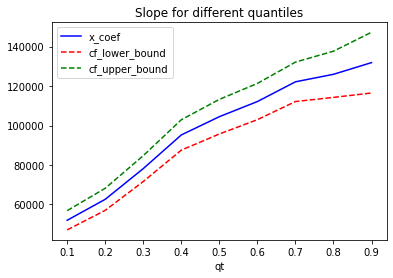

In [ ]:

# Changes in the quantile coeffiecients

plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

YEAR BUILT

In [ ]:
# Other quantiles

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['yr_built']] + res.conf_int().loc['yr_built'].tolist())

# Making a dataframe of the same name to view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

,qt,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.1,-38.037523,-99.908210,-174.317015,-25.499404
1,0.2,-57.395853,-713.257293,-799.495263,-627.019323
2,0.3,-16.504000,-1190.563871,-1295.417581,-1085.710160
3,0.4,94.451093,-1543.329912,-1668.702540,-1417.957283
4,0.5,65.734764,-1703.540383,-1849.112893,-1557.967874
5,0.6,7.146033,-1755.521340,-1910.796274,-1600.246406
6,0.7,112.346000,-1796.446151,-1969.495422,-1623.396880
7,0.8,95.240528,-1711.432592,-1921.094711,-1501.770472
8,0.9,20.461207,-1708.963993,-1992.998795,-1424.929190


In [ ]:
x_ = house['yr_built'].values.reshape(-1,1)
y_ = house['price'].values
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

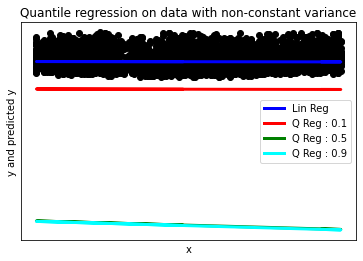

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['yr_built'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['yr_built'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['yr_built'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

<Figure size 432x288 with 0 Axes>

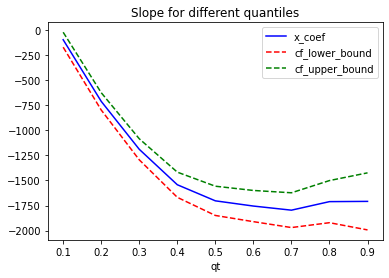

In [ ]:
# Changes in the quantile coeffiecients

plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

ZIPCODE

In [ ]:
# Other quantiles

quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['zipcode']] + res.conf_int().loc['zipcode'].tolist())

# Making a dataframe of the same name to view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
params

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
/usr/local/lib/

,qt,intercept,x_coef,cf_lower_bound,cf_upper_bound
0,0.1,-38.037523,2.971210,1.541520,4.400901
1,0.2,-57.395853,15.452964,13.784857,17.121071
2,0.3,-16.504000,25.111066,23.074860,27.147272
3,0.4,94.451093,32.136508,29.698956,34.574060
4,0.5,65.734764,35.279215,32.445427,38.113004
5,0.6,7.146033,36.327698,33.302073,39.353324
6,0.7,112.346000,37.201051,33.827192,40.574910
7,0.8,95.240528,35.734179,31.643663,39.824696
8,0.9,20.461207,36.213122,30.685521,41.740724


In [ ]:
x_ = house['zipcode'].values.reshape(-1,1)
y_ = house['price'].values
model2 = LinearRegression(fit_intercept = True, normalize = False)
model2.fit(x_, y_)

y_pred2 = model2.predict(x_)

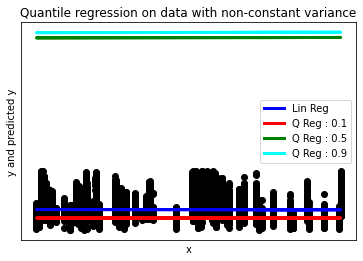

In [ ]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x_, y_,  color='black')
plt.plot(x_, y_pred2, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['zipcode'] * x_
plt.plot(x_, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['zipcode'] * x_
plt.plot(x_, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['zipcode'] * x_
plt.plot(x_, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()


<Figure size 432x288 with 0 Axes>

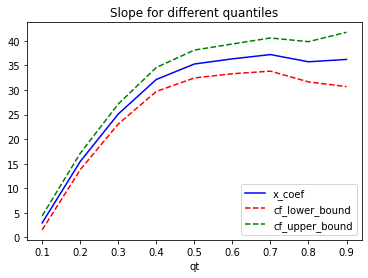

In [ ]:

# Changes in the quantile coeffiecients

plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

RIDGE REGRESSION

In [ ]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
X=house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house['price']

In [ ]:
#importing librariess
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Creating ridge model
ridge = Ridge(normalize=True)

# Setting up grid to be used
search = GridSearchCV(estimator=ridge, param_grid={'alpha':np.logspace(-5,2,8)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Running the model
search.fit(X,y)

# Gives an alpha to set parameter
search.best_params_
print(search.best_score_)

-11320973222.261496


In [ ]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

11218752855.138863


In [ ]:
# Getting coefficients

coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 15810.006278238563,
 'bedrooms': -8918.403319150146,
 'condition': 27937.772289363103,
 'floors': 12499.054139314892,
 'grade': 75672.99285651237,
 'lat': 534530.8596116462,
 'long': -3692.046081746543,
 'sqft_above': 39.934081818233835,
 'sqft_basement': 35.51183800401299,
 'sqft_living': 49.97233796040996,
 'sqft_living15': 50.03271714745872,
 'sqft_lot': -2.6877792458822936,
 'sqft_lot15': -5.46541767798107,
 'waterfront': 0.0,
 'yr_built': -1888.4844818062274,
 'zipcode': -251.8963737629409}

LASSO REGRESSION

In [ ]:
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes

X=house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house['price']
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6540585031254914
lasso MSE: 11216737959.472757
lasso coef: [ -7228.75571754  10509.02618362  85661.50520106  -8909.64539412
   6884.84160939      0.          17987.32286352  61938.76871855
 -29536.45611573 -19028.15988541 -56668.26017989 -14001.01385854
  76535.70258855   -291.24727195  25152.88359786 -16632.34446474]


In [ ]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 21.0}
lasso score: 0.6343446236052693
linear score: 0.6343282167935711
lasso MSE: 11862534435.402102
linear MSE: 11863066702.616835
lasso best estimator coef: [ -8536.57263734   9924.09660763  54731.0875234   -7621.13793275
   6877.63866906      0.          18044.90128517  61584.64964071
   1992.41112028      0.         -56760.64484667 -13900.51928916
  76052.74255342    716.65658671  24820.97286072 -18888.80043141]
linear coef: [ -8593.8494147    9966.04030783  31678.31545021  -7643.08646533
   6901.92252054      0.          18058.05389749  61596.80212785
  24581.91670569  13263.15760724 -56849.65596205 -13932.14915768
  76064.59807396    747.14572027  24823.45736129 -18892.33424609]


In [ ]:
X=house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house['price']

In [ ]:
#linear coefficient
coef_dict_baseline = {}
for coef, feat in zip(linear.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 9966.040307830583,
 'bedrooms': -8593.849414699862,
 'condition': 18058.053897492566,
 'floors': 6901.922520537215,
 'grade': 61596.802127853065,
 'lat': 76064.59807396142,
 'long': 747.1457202689971,
 'sqft_above': 24581.91670568838,
 'sqft_basement': 13263.157607236522,
 'sqft_living': 31678.315450213264,
 'sqft_living15': 24823.45736129428,
 'sqft_lot': -7643.086465326059,
 'sqft_lot15': -18892.334246085407,
 'waterfront': 0.0,
 'yr_built': -56849.65596204933,
 'zipcode': -13932.149157681582}

In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(gridlasso.best_estimator_.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 9924.09660763367,
 'bedrooms': -8536.57263733969,
 'condition': 18044.90128516889,
 'floors': 6877.638669064678,
 'grade': 61584.64964070693,
 'lat': 76052.74255342362,
 'long': 716.6565867094952,
 'sqft_above': 1992.4111202776667,
 'sqft_basement': 0.0,
 'sqft_living': 54731.08752340046,
 'sqft_living15': 24820.97286072218,
 'sqft_lot': -7621.137932745559,
 'sqft_lot15': -18888.800431407402,
 'waterfront': 0.0,
 'yr_built': -56760.64484666878,
 'zipcode': -13900.519289158487}

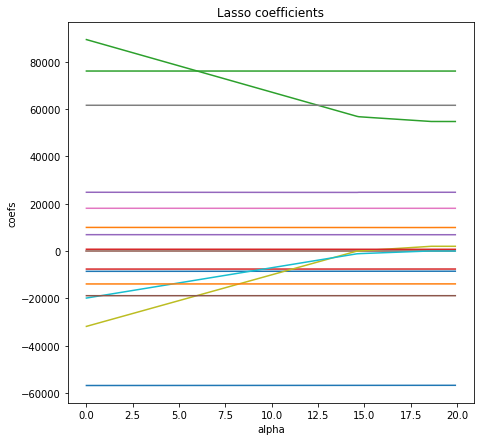

In [ ]:
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


ELASTIC NET REGRESSION

In [ ]:
from sklearn.linear_model import ElasticNet
# Linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y, y_pred=regression.predict(X)))
print(first_model)

11216737928.679111


In [ ]:
#elastic net model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
# Fitting our model and display the best parameters 
search.fit(X,y)
search.best_params_



{'alpha': 1e-05, 'l1_ratio': 0.8}

In [ ]:
search.best_score_

-11327537087.334845

In [ ]:
# setting hyperparameter to the recommended value

elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

11233382331.663284


In [ ]:

X=house[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
y=house['price']


In [ ]:
# Coefficients

coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_, X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 15057.946352046461,
 'bedrooms': -8103.968101854715,
 'condition': 28121.021154476213,
 'floors': 12385.43434308835,
 'grade': 73323.22224512801,
 'lat': 526425.6350391939,
 'long': -5902.299571078154,
 'sqft_above': 39.5157718284558,
 'sqft_basement': 35.721309668323244,
 'sqft_living': 49.64099286189063,
 'sqft_living15': 50.70860481509798,
 'sqft_lot': -2.732087776348944,
 'sqft_lot15': -5.286154746457335,
 'waterfront': 0.0,
 'yr_built': -1799.3863655662608,
 'zipcode': -233.40082216381543}

##IMPLEMENTING THE SOLUTION

We would look at the MSE values of each model to determine the accurate model.


*   Multiple Linear Regression  28342898727.61848
*   Ridge Regression            11218752855.138863
*   Lasso Regression            11862534435.402102
*   Elastic Net Regression      11216737928.679111








Looking at the MSE values Lasso Regression has the least MSE hence it is the best model to be used to predict the housing prices.